In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.datasets import  mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_test.shape

(10000, 28, 28)

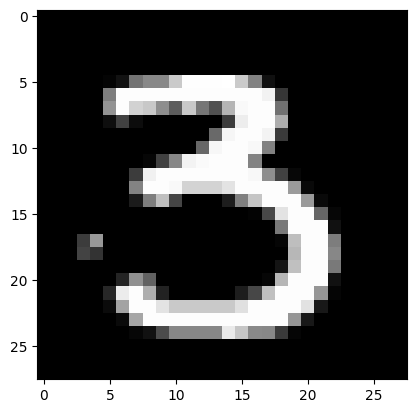

In [10]:
i = random.randint(1,60000)
plt.imshow( x_train[i] , cmap='gray')

In [11]:
label = y_train[i]
print(label)

3


In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
added_noise = np.random.randn(*(28,28))

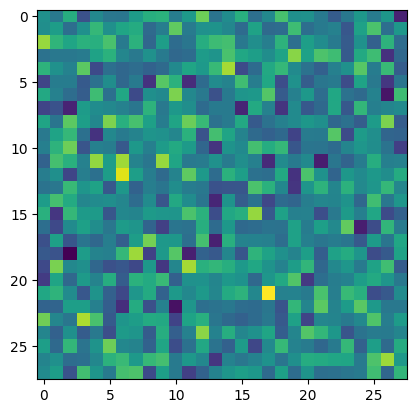

In [20]:
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))
plt.imshow(added_noise)

In [28]:
noise_factor = 0.2
sample_image = x_train[101]
noisy_simple_image = sample_image + noise_factor * np.random.randn(*(28,28))


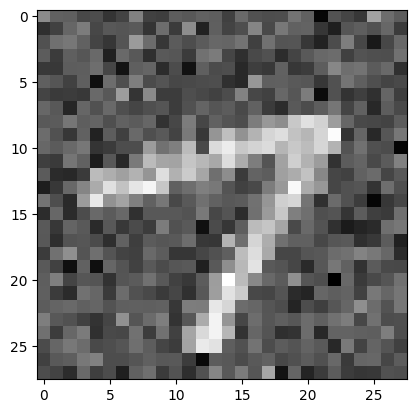

In [29]:
plt.imshow(noisy_simple_image, cmap="gray")

In [31]:
noisy_simple_image.max()


1.3176893946712336

In [32]:
noisy_simple_image.min()

-0.6401798580047184

In [33]:
noisy_simple_image = np.clip(noisy_simple_image,0.,1.)

In [34]:
noisy_simple_image.max()

1.0

In [35]:
noisy_simple_image.min()

0.0

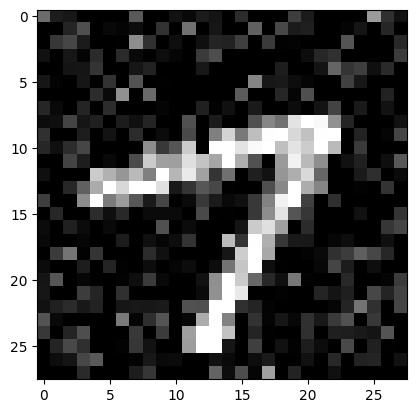

In [36]:
plt.imshow(noisy_simple_image, cmap="gray")

In [37]:
X_train_noisy = []
oise_factor = 0.2

In [38]:
for sample_image in x_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy,0.,1.)
  X_train_noisy.append(sample_image_noisy)

In [39]:
X_train_noisy = np.array(X_train_noisy)

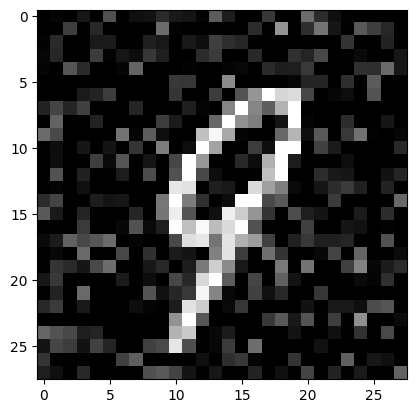

In [40]:
plt.imshow(X_train_noisy[22], cmap="gray")

In [41]:
x_test_noisy = []
noise_factor = 0.4


In [42]:
for sample_image in x_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  x_test_noisy.append(sample_image_noisy)

x_test_noisy = np.array(x_test_noisy)

In [43]:
x_test_noisy.shape

(10000, 28, 28)

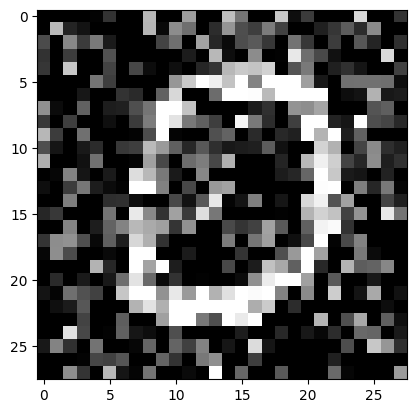

In [44]:
plt.imshow(x_test_noisy[10], cmap = 'gray')

In [45]:
#Creando modelo
autoencoder = tf.keras.models.Sequential()
#armando capa convolucional
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.MaxPool2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(8,(3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.MaxPool2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(8,(3,3), strides=1, padding="same"))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8,(3,3), strides=1, padding="same"))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1,(3,3), strides=1,activation='sigmoid', padding="same"))

#Compilado
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 8)         0

In [48]:
autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),
 x_train.reshape(-1, 28, 28, 1),
  epochs=10,
  batch_size=200)

Epoch 1/10
300/300 [==============================] - 50s 162ms/step - loss: 0.2019
Epoch 2/10
300/300 [==============================] - 51s 168ms/step - loss: 0.1073
Epoch 3/10
300/300 [==============================] - 50s 168ms/step - loss: 0.0999
Epoch 4/10
300/300 [==============================] - 48s 162ms/step - loss: 0.0967
Epoch 5/10
300/300 [==============================] - 51s 169ms/step - loss: 0.0947
Epoch 6/10
300/300 [==============================] - 50s 166ms/step - loss: 0.0932
Epoch 7/10
300/300 [==============================] - 47s 158ms/step - loss: 0.0921
Epoch 8/10
300/300 [==============================] - 47s 155ms/step - loss: 0.0911
Epoch 9/10
300/300 [==============================] - 47s 156ms/step - loss: 0.0903
Epoch 10/10
300/300 [==============================] - 45s 150ms/step - loss: 0.0897


1/1 [==============================] - 0s 33ms/step
(15, 28, 28, 1)


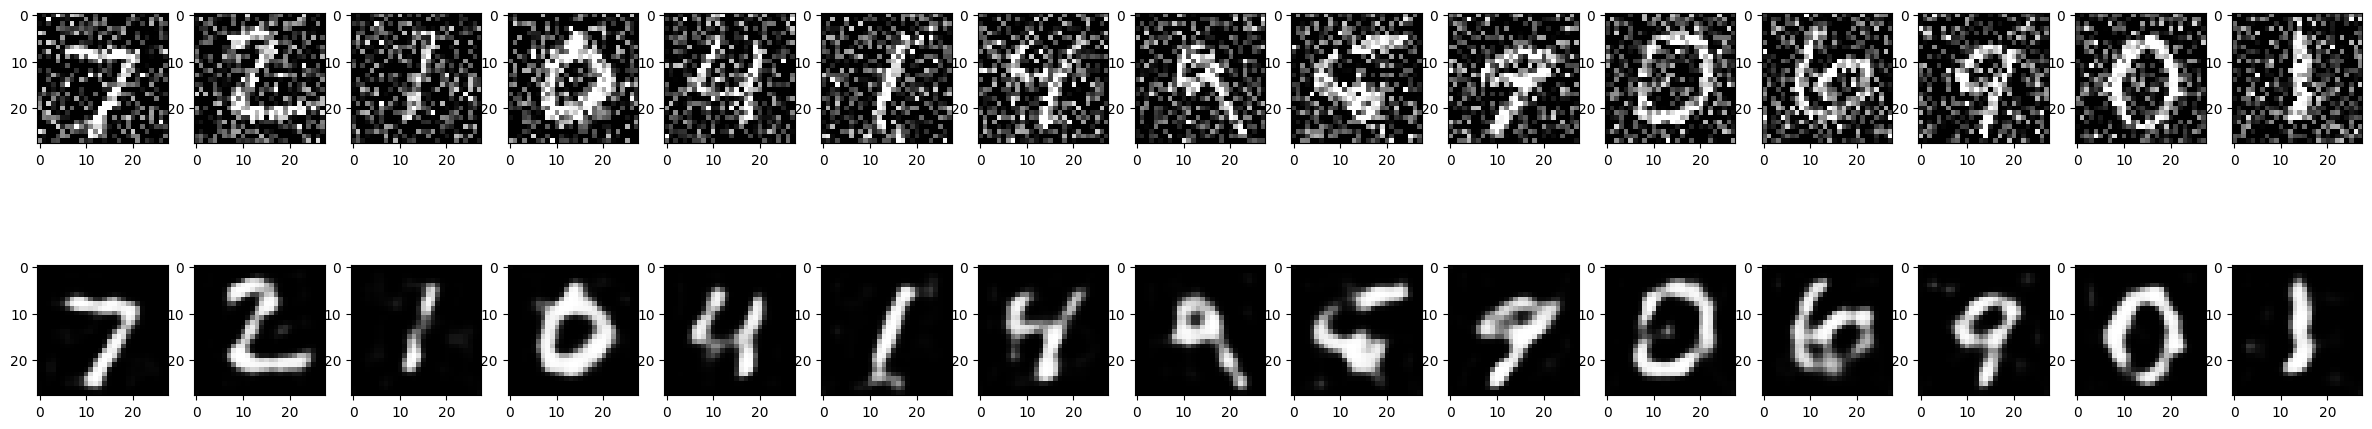

In [55]:
denoised_images = autoencoder.predict(x_test_noisy[:15].reshape(-1, 28, 28, 1))
print(denoised_images.shape)
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([x_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')